In [2]:
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import nltk
import pandas as pd

In [3]:
data = pd.read_csv(r"./UTPBatchModified_final.csv",encoding  ='ANSI')
data.head(20)
data.drop(["MFR_P/N","MFR_P/N.1",'ADDITIONAL_MFR_VEND_AND_P/N','UNUSED_TEXT',
 'REPLACED_TEXT','COMMENTS','Vendor_NAME_1',
 'Vendor_P/N',
 'Mfr/Vendor_Remarks'], axis = 1, inplace = True) 
columns = []
data


,UIPL_ID,DESCRIPTION,MFR_NAME,MFR_NAME_1,NOUN,MODIFIER,ATTRIBUTE_NAME_1,STANDARDIZED_VALUE_1,ATTRIBUTE_NAME_2,STANDARDIZED_VALUE_2,...,STANDARDIZED_VALUE_16,ATTRIBUTE_NAME_17,STANDARDIZED_VALUE_17,ATTRIBUTE_NAME_18,STANDARDIZED_VALUE_18,ATTRIBUTE_NAME_19,STANDARDIZED_VALUE_19,ATTRIBUTE_NAME_20,STANDARDIZED_VALUE_20,STATUS (CLEANSED/HOLD/ENRICHED)
0,000000000001024985_1,VALVE BALL SS 3/4 SCR 800LB RD HANDLE APOLLO ...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,3/4 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
1,000000000001143420_1,VALVE BALL SS 316 3/4 SCR 275LB 2000LB WOG GR...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,3/4 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
2,000000000027111337_1,VALVE BALL SS 316 1IN 2000LB WOG W/LOCKING HA...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,1 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
3,000000000001150198_1,VALVE BALL SS 316 1IN APOLLO 76-105-14- 24-27...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,1 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
4,000000000027111349_1,VALVE BALL SS 316 1IN 2000LB WOG W/OVAL HANDL...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,1 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,000000000001181015_1,VALVE BALL SS 316 1/2 SCR 150LB 2000LB WOG W/...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,1/2 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
1002,000000000034865466_1,VALVE BALL SS 316 3/4 APOLLO 76-104 2000LB TH...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,3/4 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
1003,000000000027111336_1,VALVE BALL SS 316 3/4 SCR 2000LB WOG W/LOCKIN...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,3/4 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED
1004,000000000027111007_1,VALVE BALL SS 316 3/4 150LB SCR V256 REINFORC...,APOLLO,APOLLO,VALVE,BALL,TYPE,2-PIECE,NOMINAL SIZE,3/4 IN,...,-,-,-,-,-,-,-,-,-,ENRICHED


In [4]:
for col in data.columns:
        columns.append(col)
columns

['UIPL_ID',
 'DESCRIPTION',
 'MFR_NAME',
 'MFR_NAME_1',
 'NOUN',
 'MODIFIER',
 'ATTRIBUTE_NAME_1',
 'STANDARDIZED_VALUE_1',
 'ATTRIBUTE_NAME_2',
 'STANDARDIZED_VALUE_2',
 'ATTRIBUTE_NAME_3',
 'STANDARDIZED_VALUE_3',
 'ATTRIBUTE_NAME_4',
 'STANDARDIZED_VALUE_4',
 'ATTRIBUTE_NAME_5',
 'STANDARDIZED_VALUE_5',
 'ATTRIBUTE_NAME_6',
 'STANDARDIZED_VALUE_6',
 'ATTRIBUTE_NAME_7',
 'STANDARDIZED_VALUE_7',
 'ATTRIBUTE_NAME_8',
 'STANDARDIZED_VALUE_8',
 'ATTRIBUTE_NAME_9',
 'STANDARDIZED_VALUE_9',
 'ATTRIBUTE_NAME_10',
 'STANDARDIZED_VALUE_10',
 'ATTRIBUTE_NAME_11',
 'STANDARDIZED_VALUE_11',
 'ATTRIBUTE_NAME_12',
 'STANDARDIZED_VALUE_12',
 'ATTRIBUTE_NAME_13',
 'STANDARDIZED_VALUE_13',
 'ATTRIBUTE_NAME_14',
 'STANDARDIZED_VALUE_14',
 'ATTRIBUTE_NAME_15',
 'STANDARDIZED_VALUE_15',
 'ATTRIBUTE_NAME_16',
 'STANDARDIZED_VALUE_16',
 'ATTRIBUTE_NAME_17',
 'STANDARDIZED_VALUE_17',
 'ATTRIBUTE_NAME_18',
 'STANDARDIZED_VALUE_18',
 'ATTRIBUTE_NAME_19',
 'STANDARDIZED_VALUE_19',
 'ATTRIBUTE_NAME_20',
 'STAN

In [5]:
tags = []
words = list(set(data['DESCRIPTION'].values))
for i in range(0,len(columns)) :
    tags.append(data[columns[i]]) 

tags = tags[2:]
len(words)

946

In [6]:
from nltk.tokenize import word_tokenize
new_words=[]
for w in words:
    t = word_tokenize(w)
    new_words.append(t)
new_words = list(np.concatenate(new_words).flat)
new_words = list(set(new_words))
len(new_words)

3446

In [7]:
sentences =[]
new_tags = np.array(tags)
new_tags = np.transpose(new_tags)
usable_tags = new_tags
new_tags = list(new_tags)
new_tags = list(np.concatenate(new_tags).flat)
new_tags = list(set(new_tags))
new_tags.append('<sos>')
new_tags.append('<eos>')
new_tags

['1 TO 16 BAR',
 'LATCH MATERIAL:STAINLESS STEEL FEATURES:WITH LATCH LOCK',
 'BUTT WELD',
 '67.5 MM',
 '100 TO 3000 PSI/7 TO 210 BAR',
 '120 V 60 HZ',
 'SEAT MATERIAL:PTFE BALL MATERIAL:CHROMIUM PLATED FEATURES:BLOWOUT PROOF',
 'SHAPE:ELBOW',
 '3.56 IN',
 '10 IN',
 'SOCKET WELD',
 '-15 TO 400 DEG F/-26 TO 204 DEG C',
 'ORIFICE SIZE',
 '-',
 '345 BAR/5000 PSI',
 '2 TO 10 BAR',
 'DIN WITH PLUG',
 '150 PSIG SATURATED STEAM 2000 PSIG COLD NON-SHOCK',
 '5.12 IN',
 'DUAL V',
 'CONNECTION SIZE:26 MM VALVE FUNCTION:EXHAUSTED',
 'SOLENOID',
 '19.2 IN/488 MM',
 'PTFE DISC',
 'ACTUATION TYPE',
 '2.4 IN/61 MM',
 'VOLTAGE:110/120 V FREQUENCY:50/60 HZ AMPERE:0.49/58 A',
 'CHROME STEM',
 'CONNECTION SIZE:1/4 IN INCLUDES:BASE PLATE',
 'CONNECTION SIZE:1/8 IN',
 'FLOW RATING:30 GPM PILOT RATIO:3:1 BODY TYPE:DUAL 02H-SANDWICH',
 '5 IN/127 MM',
 'FISHER CONTROLS',
 'METAL HARDFACED',
 'FPT X FPT',
 'FEMALE-UNF X FEMALE-SAE',
 '1-3/4 IN',
 '1975 PSI @ 100 DEG F 136.2 BAR DEG F',
 'ACTUATOR SIZE:1',
 'PROP

In [8]:
sentences = []
for x,y in zip(words,usable_tags):
    x = word_tokenize(x)
    sentences.append((x,y))
len(sentences)

946

In [327]:
word2idx = {new_words[i]:i for i in range(0,len(new_words))}
word2idx
idx2word = {i:new_words[i] for i in range(0,len(new_words))}
idx2word

{0: 'DISPLAY',
 1: '80PSI|3-10BAR|MDL',
 2: 'W/LOCKOUT',
 3: 'RUBBER',
 4: 'OS',
 5: 'C1200B-FF',
 6: 'BODY|HANDWHEEL',
 7: '.72-.75A',
 8: '3610JP',
 9: 'COUNTER',
 10: '554SA400-6',
 11: '559|STOCKHAM',
 12: 'FETSO',
 13: 'STEAM',
 14: 'RETAINER',
 15: 'F-11-4B-2TY|POWELL',
 16: 'POS|A8990-87-0064D-2',
 17: 'SQ',
 18: 'W/SS|PISTON',
 19: '110VAC',
 20: '67CFR',
 21: 'VAL0105520',
 22: 'PRESS|1600CUR.MA',
 23: 'H400SS-HL1/2-1',
 24: '815W11-3600TTC',
 25: 'OUTLET',
 26: '3000',
 27: '36',
 28: '848Y',
 29: '268373-067',
 30: 'VLV|SUN',
 31: '6-3/8',
 32: '9C400S65E',
 33: '650|PSI',
 34: '9650-0470-0100-1122-0040',
 35: 'HW',
 36: 'D3W4C1Y',
 37: 'SOLENOID',
 38: '2608',
 39: 'W/2EA|120VAC',
 40: 'D61VW001C4NYCF3',
 41: '500LB',
 42: 'FITTINGS|FLUOROCARB',
 43: 'RP',
 44: 'WAY|MDL',
 45: 'CPI-FF8S5A',
 46: '317/CP|SEAT',
 47: 'MC6-B-3633-18',
 48: 'D1VW006CVYWF',
 49: 'AMPS',
 50: 'TRIM|150LB',
 51: 'D1VW020BNYCF',
 52: 'BARS|MDL',
 53: 'STL',
 54: '30-OF-U',
 55: 'SEAT|SS/PL',
 56: '

In [328]:
tags2idx ={new_tags[i]:i for i in range(0,len(new_tags))}
idx2tags ={i:new_tags[i] for i in range(0,len(new_tags))}

tags2idx


{'SIZE:NFPA-D05': 0,
 '28 IN HG VACUUM TO 150 PSIG VACUUM TO 10 BAR': 1,
 '7.4 IN/188 MM': 2,
 'WALL SWING': 3,
 'CSA NFPA D03 CETOP 3 DIN': 4,
 '110 TO 120 VAC 50/60 HZ 0.42 A': 5,
 '3/4 IN/20 MM': 6,
 '5.5 IN/140 MM': 7,
 '25 TO 800 PSI/17 TO 55 BAR': 8,
 'ISO 5599-1/CONFORMS TO ROHS': 9,
 'HD METAL SEAT CHROME PLATED DISC': 10,
 '316 STAINLESS STEEL STEM WEDGE STEEL SEAT': 11,
 'VALVE FUNCTION:CLOSED CONNECTION SIZE:42 MM': 12,
 'BONNET JOINT:BOLTED FEATURE:HARD FACED SEAT/DISC': 13,
 'SERRATED FACE': 14,
 '2.25 IN': 15,
 '-49 TO 122 DEG F/-45 TO 50 DEG C': 16,
 '4-WAY/3-POSITION CLOSED CENTER': 17,
 '5000 PSI/345 BAR': 18,
 'PTFE SX SEAL/321 STAINLESS STEEL WEDGE RING/STAINLESS STEEL ANTISTATIC SPRING/FKM COVER SEAL/321 STAINLESS STEEL COVER/304 STAINLESS STEEL SET SCREW/STAINLESS STEEL TOP PLATE/STAINLESS STEEL SCREW/STAINLESS STEEL LEVER': 19,
 'CAST BRONZE': 20,
 'LINED HORIZONDAL': 21,
 'PILOT RATIO:3:1 BODY TYPE:SANDWICH': 22,
 'APPLICATION:HYDRAULIC': 23,
 '211.1 MM/8.31 IN':

In [329]:
X=[]
Y=[]
for w,t in sentences:
    l=[]
    k=[]
    for wrd in w:
        l.append(word2idx[wrd])
    X.append(l)   
    for tg in t:
        k.append(tags2idx[tg])
    Y.append(k)
Y[1]


[132,
 132,
 421,
 831,
 615,
 466,
 444,
 1025,
 398,
 551,
 591,
 794,
 827,
 303,
 1128,
 331,
 823,
 1084,
 1068,
 627,
 685,
 794,
 681,
 794,
 659,
 794,
 1087,
 475,
 137,
 794,
 877,
 213,
 1041,
 318,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 885]

In [330]:
p = []
for i in X :
    p.append(len(i))


In [331]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
max_len = 30
X = pad_sequences(maxlen = max_len,sequences = X,padding = 'post',value = len(words)-1)






In [332]:
Y[2]

[132,
 132,
 421,
 831,
 615,
 466,
 444,
 830,
 398,
 551,
 591,
 794,
 827,
 303,
 1128,
 331,
 823,
 909,
 1068,
 627,
 685,
 67,
 681,
 979,
 659,
 111,
 1087,
 475,
 137,
 794,
 877,
 213,
 1041,
 248,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 885]

In [333]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=1)
decoder_input_test = Y_test
decoder_input_test = np.roll(decoder_input_test,1,axis = 1)
Y_test = [to_categorical(i,num_classes = len(tags2idx)) for i in Y_test]
Y_train[1]

[514,
 514,
 421,
 992,
 615,
 794,
 444,
 734,
 398,
 59,
 591,
 930,
 827,
 945,
 1128,
 940,
 823,
 644,
 1068,
 794,
 685,
 794,
 681,
 792,
 659,
 794,
 1087,
 794,
 137,
 794,
 877,
 794,
 1041,
 348,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 794,
 885]

In [334]:
decoder_input = Y_train
decoder_input = np.roll(decoder_input,1,axis = 1)
decoder_input[1]
Y_train = [to_categorical(i,num_classes = len(tags2idx)) for i in Y_train]
len(Y_train[1])

45

In [335]:
from tensorflow.keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional,TimeDistributed
from tensorflow.keras import Model,Input
encoder_inputs = Input(shape=(30,))
encoder_embedding = Embedding(
    len(word2idx),
    20,
        input_length=len(X[1]),trainable = True
)(encoder_inputs)
encoder = LSTM(30, return_state=True,return_sequences=False)(encoder_embedding)
encoder_outputs, state_h, state_c = encoder
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(len(Y[1]),))
decoder_embedding = Embedding(
    len(tags2idx),
    20,
        input_length=len(Y[1]),trainable = True)(decoder_inputs)

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(30, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding,
                                     initial_state=encoder_states)
decoder_dense = Dense(len(tags2idx), activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 30, 20)       68920       input_17[0][0]                   
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 45, 20)       23980       input_18[0][0]                   
____________________________________________________________________________________________

In [336]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.09)
model.compile(optimizer = adam,loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [337]:

history = model.fit([X_train,decoder_input],np.array(Y_train),validation_split = 0.2,batch_size = 32,epochs = 50,verbose = 1)

Train on 680 samples, validate on 171 samples
Epoch 1/50
680/680 [==============================] - 5s 8ms/sample - loss: 3.7030 - accuracy: 0.3805 - val_loss: 2.5572 - val_accuracy: 0.4763
Epoch 2/50
680/680 [==============================] - 2s 3ms/sample - loss: 2.0771 - accuracy: 0.5837 - val_loss: 1.7891 - val_accuracy: 0.6455
Epoch 3/50
680/680 [==============================] - 2s 3ms/sample - loss: 1.5315 - accuracy: 0.6899 - val_loss: 1.4219 - val_accuracy: 0.7120
Epoch 4/50
680/680 [==============================] - 2s 3ms/sample - loss: 1.1994 - accuracy: 0.7447 - val_loss: 1.2155 - val_accuracy: 0.7511
Epoch 5/50
680/680 [==============================] - 2s 3ms/sample - loss: 1.0328 - accuracy: 0.7682 - val_loss: 1.1183 - val_accuracy: 0.7675
Epoch 6/50
680/680 [==============================] - 2s 3ms/sample - loss: 0.9526 - accuracy: 0.7774 - val_loss: 1.0427 - val_accuracy: 0.7756
Epoch 7/50
680/680 [==============================] - 2s 3ms/sample - loss: 0.8777 - accur

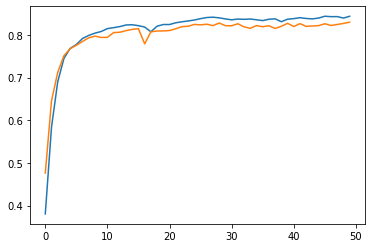

In [338]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


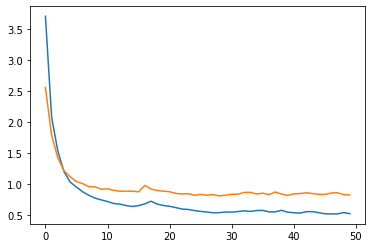

In [339]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [340]:
model.evaluate([X_test,decoder_input_test],np.array(Y_test))

95/95 [==============================] - 0s 724us/sample - loss: 0.7800 - accuracy: 0.8344


[0.780000438815669, 0.834386]

In [348]:
p = model.predict([X_test,decoder_input_test])
p                   

array([[[4.02848173e-06, 2.11635590e-04, 1.06897033e-10, ...,
         5.74343559e-11, 8.80706796e-09, 7.79256037e-09],
        [1.52605029e-09, 2.16237119e-12, 8.38530656e-17, ...,
         3.42518479e-11, 1.71211573e-10, 1.73126360e-10],
        [1.13094689e-17, 1.26496595e-21, 5.85728654e-23, ...,
         2.76211383e-16, 1.34598906e-14, 1.68705737e-14],
        ...,
        [1.22832761e-13, 7.61128920e-12, 3.52132243e-16, ...,
         5.42385527e-13, 8.46518544e-15, 8.27754731e-15],
        [1.22834075e-13, 7.61134124e-12, 3.52125228e-16, ...,
         5.42376799e-13, 8.46504992e-15, 8.27741518e-15],
        [1.22836921e-13, 7.61159018e-12, 3.52120014e-16, ...,
         5.42373872e-13, 8.46498808e-15, 8.27738638e-15]],

       [[6.01066245e-12, 2.91758725e-19, 1.92284712e-11, ...,
         2.64433111e-11, 3.89163155e-08, 4.03808293e-08],
        [5.62751133e-19, 8.47979397e-19, 2.76694810e-18, ...,
         2.49392436e-14, 9.84562367e-13, 8.08212275e-13],
        [9.89317163e-27, 

In [349]:
Y_pred =[]
I = 9
for t in p[I]:
    k = np.argmax(t)
    Y_pred.append(k)
output = []
for y in Y_pred :
    output.append(idx2tags[y])


In [350]:
Y_actual =[]
for t in Y_test[I]:
    k = np.argmax(t)
    Y_actual.append(k)

act_output = []
for y in Y_actual :
    act_output.append(idx2tags[y])


In [351]:
output = np.array(output)
output

array(['DEZURIK', 'DEZURIK', 'VALVE', 'BALL', 'TYPE', '-', 'NOMINAL SIZE',
       '10 IN', 'END CONNECTION', 'FLANGED', 'PRESSURE CLASS/RATING',
       '150 LB', 'BODY MATERIAL', '316 STAINLESS STEEL', 'TRIM MATERIAL',
       '-', 'ACTUATION TYPE', '-', 'DESIGN PRESSURE RANGE', '-',
       'PORT TYPE', 'V', 'END TO END DISTANCE', '-', 'CONFIGURATION', '-',
       'SOFTGOODS', '-', 'TEMPERATURE RATING', '-',
       'CERTIFICATION/STANDARD', '-', 'ADDITIONAL FEATURES', '-', '-',
       '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'], dtype='<U22')

In [352]:
act_output = np.array(act_output)
act_output

array(['DEZURIK', 'DEZURIK', 'VALVE', 'BALL', 'TYPE', '-', 'NOMINAL SIZE',
       '8 IN', 'END CONNECTION', 'FLANGED', 'PRESSURE CLASS/RATING',
       '150 LB', 'BODY MATERIAL', '316 STAINLESS STEEL', 'TRIM MATERIAL',
       '-', 'ACTUATION TYPE', '-', 'DESIGN PRESSURE RANGE', '-',
       'PORT TYPE', 'V', 'END TO END DISTANCE', '-', 'CONFIGURATION', '-',
       'SOFTGOODS', '-', 'TEMPERATURE RATING', '-',
       'CERTIFICATION/STANDARD', '-', 'ADDITIONAL FEATURES',
       'SEAT MATERIAL:PTFE', '-', '-', '-', '-', '-', '-', '-', '-', '-',
       '-', 'CLEANSED'], dtype='<U22')

In [353]:
inp = []
for t in X_test[I]:
    inp.append(idx2word[t])

inp

['VALVE',
 'BALL',
 'SS',
 '316',
 '1/2',
 'SCR',
 '150LB',
 '2000LB',
 'WOG',
 'W/LATCH',
 'LOCK',
 'WHEEL',
 'HANDLE|APOLLO',
 '76-103-39A',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN',
 'PORT|W/PLUG-IN']

In [354]:
X_test[6]

array([2880, 2445, 1223, 3137, 1803,  945,  945,  945,  945,  945,  945,
        945,  945,  945,  945,  945,  945,  945,  945,  945,  945,  945,
        945,  945,  945,  945,  945,  945,  945,  945])